In [166]:
import torch
import torchvision
import os
import collections

# This example uses Alexnet
model = torchvision.models.alexnet(pretrained=True).cuda()

def load_checkpoint(model, chkpt_file):
    if os.path.isfile(chkpt_file):
        checkpoint = torch.load(chkpt_file)
        model.load_state_dict(checkpoint['state_dict'])
        
#model = torchvision.models.alexnet(pretrained=False).cuda()
#load_checkpoint(model, 'checkpoint.pth.tar')

In [169]:
def make_params(model):
    params = collections.OrderedDict()
    for name, param in model.named_parameters():
        print(name)
        params[name] = (param, param.size())
    return params
            
def to_np(x):
    return x.data.cpu().numpy()

In [170]:
params = make_params(model)

features.0.weight
features.0.bias
features.3.weight
features.3.bias
features.6.weight
features.6.bias
features.8.weight
features.8.bias
features.10.weight
features.10.bias
classifier.1.weight
classifier.1.bias
classifier.4.weight
classifier.4.bias
classifier.6.weight
classifier.6.bias


torch.Size([4096, 4096])
2
torch.Size([4096, 4096])


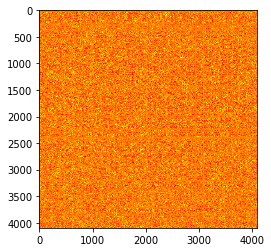

In [178]:
#weights = model.features[0].weight
weights = params['classifier.4.weight'][0]
print(weights.size())

def flatten(weights):
    weights = weights.view(weights.numel())
    weights = to_np(weights)
    return weights

print(len(weights.size()))
assert len(weights.size()) in [2,4], "something's wrong"
 
weights2d = None
if len(weights.size()) == 4:
    weights2d = weights.view(weights.size()[0]*weights.size()[1], -1)
    weights2d = weights2d.detach()
else:
     weights2d = weights.detach()
print(weights2d.size())

plt.imshow(weights2d, cmap='hot', interpolation='nearest')
plt.show()

In [187]:
import numpy as np
import matplotlib.pyplot as plt

def plot_params(params, which='weight'):
    def shape_to_str(shape):
        shape_str = '('+(', ').join(['%d' % v for v in shape])+')'
        volume = 1
        for v in shape: volume *= int(v) 
        return shape_str, volume
    
    for name, info in params.items():
        weights = info[0]
        if which not in name:
            continue
        weights = flatten(weights)
        n, bins, patches = plt.hist(weights, bins=100)
        plt.title(name)
        plt.show()
        print("mean: %f\nstddev: %f" % (weights.mean(), weights.std()))
        print("size %s %d" % shape_to_str(info[1]))
    

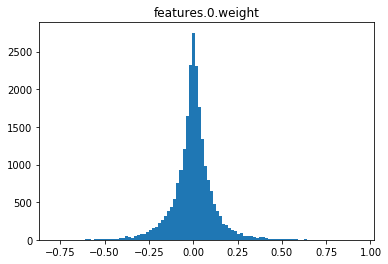

mean: -0.000079
stddev: 0.116981
size (64, 3, 11, 11) 23232


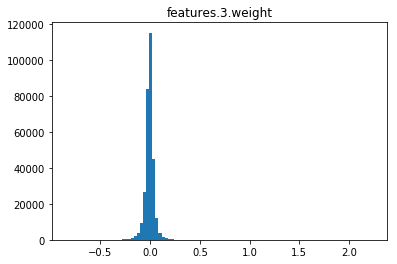

mean: -0.003156
stddev: 0.047065
size (192, 64, 5, 5) 307200


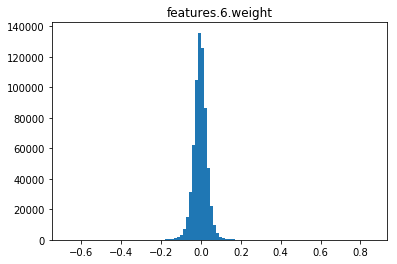

mean: -0.002944
stddev: 0.035034
size (384, 192, 3, 3) 663552


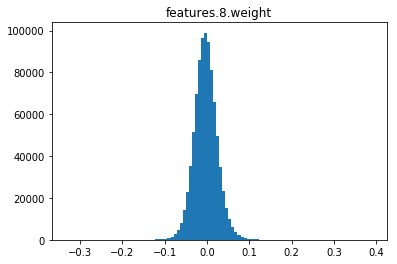

mean: -0.003081
stddev: 0.027616
size (256, 384, 3, 3) 884736


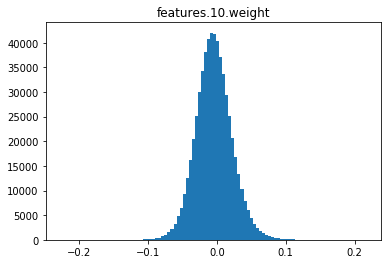

mean: -0.004106
stddev: 0.026379
size (256, 256, 3, 3) 589824


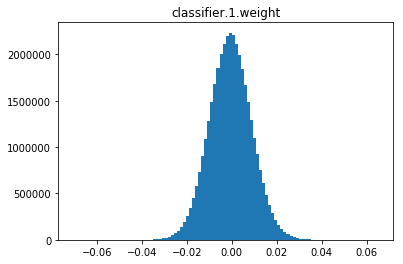

mean: -0.000563
stddev: 0.009349
size (4096, 9216) 37748736


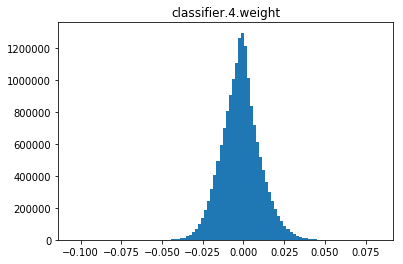

mean: -0.001645
stddev: 0.011662
size (4096, 4096) 16777216


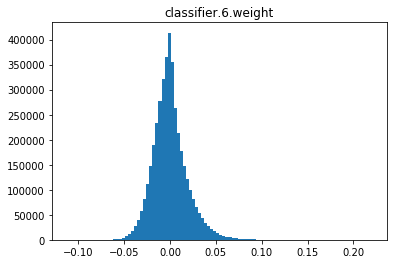

mean: 0.000000
stddev: 0.018723
size (1000, 4096) 4096000


In [188]:
plot_params(params)